## Task 2: Prediction using Unsupervised Learning

<b>AIM:<b> To predict the optinum number of clusters and represent it visually

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [43]:
df = pd.read_csv('/home/pearlruby/Desktop/TSF-GRIP/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


* Created a data frame (df) using csv file

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* The df has gotten 4 predictors such as SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm.
* There are no missing values in df.
* df has a shape of 150 rows and 5 columns excluding Id column

In [45]:
del df['Id']

* There is no significant use of Id column. So, it is deleted from the df.

In [46]:
X = df.iloc[:,:4]
X.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


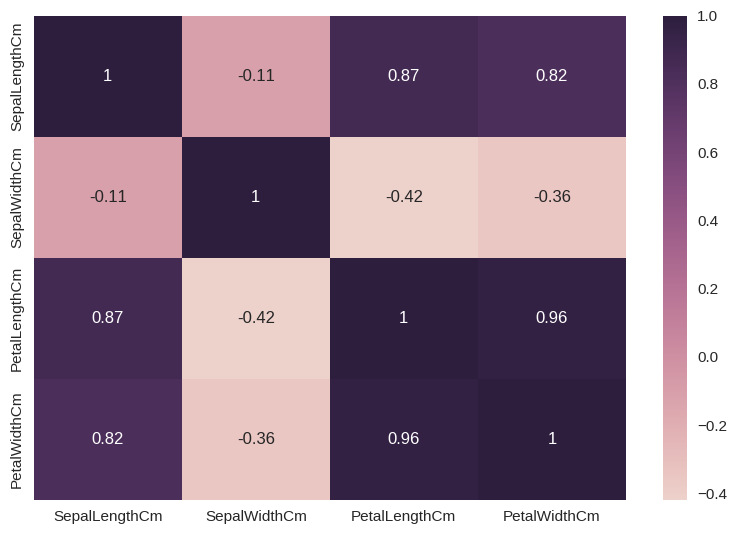

In [47]:
sns.heatmap(X.corr(),
            annot = True, 
            cmap = sns.cubehelix_palette(as_cmap =  True))
plt.show()

* Correlation heatmap between predictors 

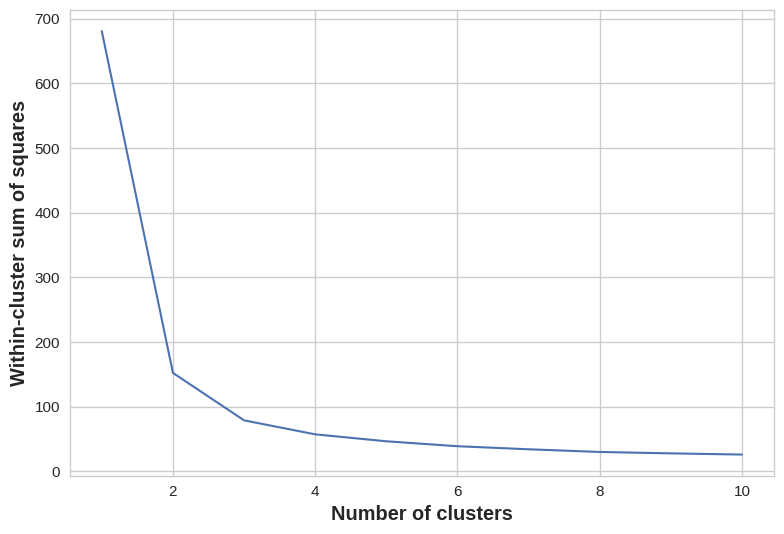

In [48]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()


* The Elbow point is at 3rd unit on x-axis. Therefore, the optimal number of clusters is 3 for the df.

In [49]:
kmeans=KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


* New column called 'Cluster' is added to the df. It contains predicted values with values 0, 1, and 2.

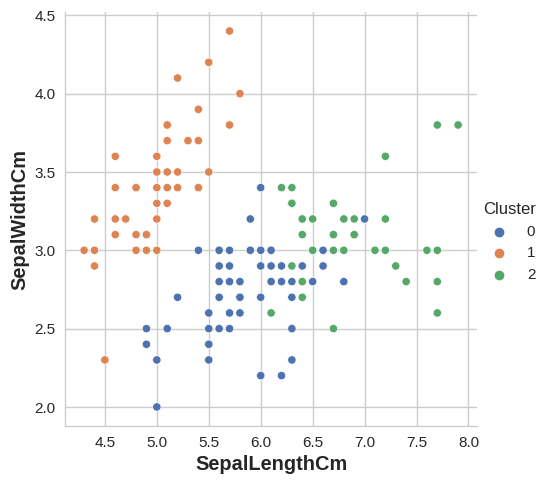

In [50]:
import seaborn as sns

sns.relplot(data=X,x='SepalLengthCm', y='SepalWidthCm', hue='Cluster'
);
plt.show()

* Visuale of clusters between 'SepalLengthCm' and 'SepalWidthCm'

In [51]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

- 0th cluster represents 'Iris-setosa'
- 1st cluster represents 'Iris-versicolor'
- 2nd cluster represents 'Iris-virginica'

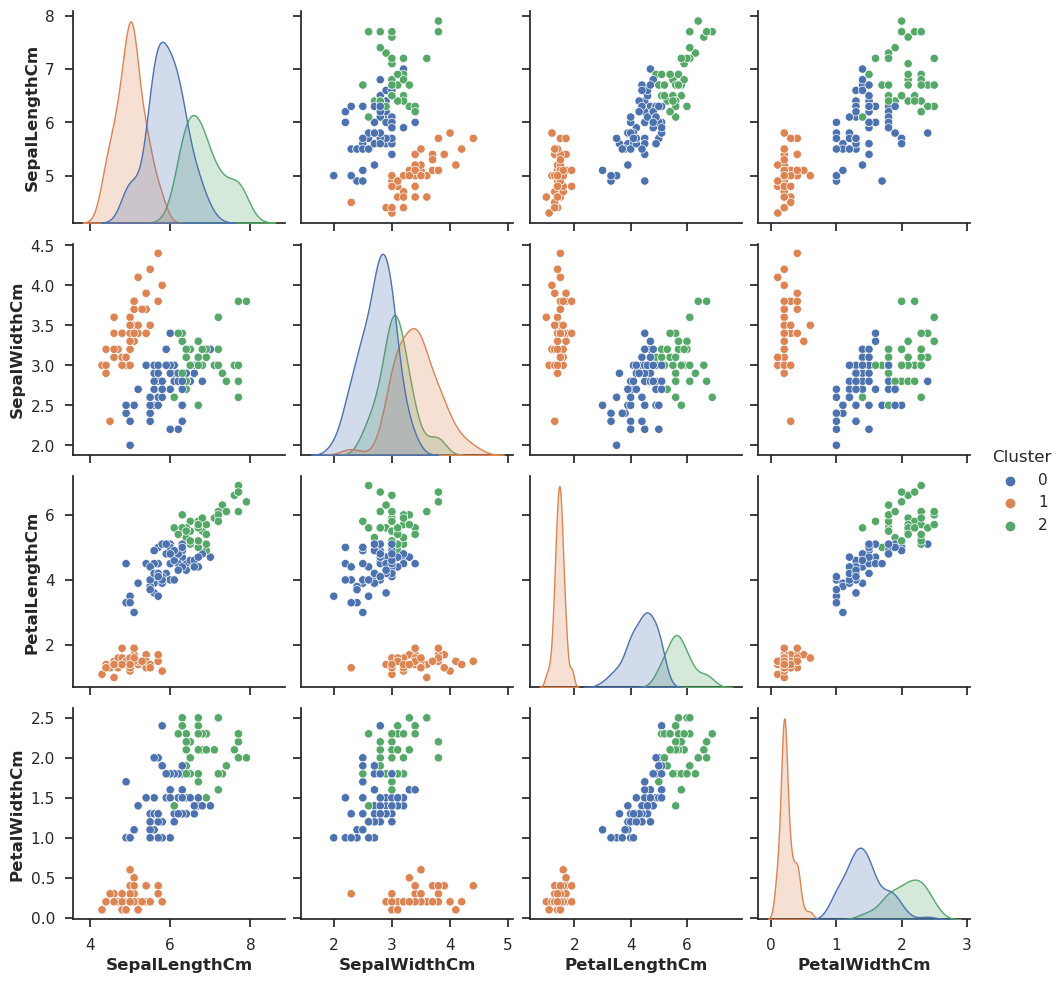

In [52]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(X, hue="Cluster")
plt.show()